<a href="https://colab.research.google.com/github/rismawidiyanti/news-rnn-lstm/blob/main/News_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
!pip uninstall -y numpy pandas scipy matplotlib tensorflow scikit-learn
!pip install numpy pandas scipy matplotlib tensorflow scikit-learn

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import IFrame
from plotly.offline import plot
pd.set_option('display.max_colwidth',None)
from collections import Counter
import string
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import LatentDirichletAllocation
import re
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet,stopwords
from wordcloud import WordCloud

In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
!pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

In [3]:
import gensim.downloader as gensim_downloader
from tqdm import tqdm

# **Load Data**

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacopoferretti/bbc-articles-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bbc-articles-dataset


In [8]:
df = pd.read_csv(os.path.join(path, '/kaggle/input/bbc-articles-dataset/archive/bbc_text_cls.csv'))

In [9]:
df.head()

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [11]:
df['labels'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

# **Exploratory Data Analysis**

In [12]:
counts = df['labels'].value_counts().reset_index()
counts.columns = ['Target Classes', 'Count']

fig1 = px.bar(
    counts,
    x='Target Classes',
    y='Count',
    title='Distribution of Target Classes',
    labels={"Target Classes": "Target Classes", "Count": "Count"},
    text='Count'
)

fig1.update_traces(texttemplate='%{text}', textposition='outside')
fig1.update_layout(
    xaxis=dict(title="Target Classes"),
    yaxis=dict(title="Count"),
    showlegend=False,
    title=dict(font=dict(size=20))
)

fig1.show()

In [13]:
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
word_counts = {
    category: df[df['labels'] == category]['text'].str.split().map(len)
    for category in categories
}
fig2 = make_subplots(rows=1, cols=5, subplot_titles=categories)

colors = ['navy', 'orange', 'green', 'yellow', 'red']
for i, category in enumerate(categories):
    fig2.add_trace(
        go.Histogram(
            x=word_counts[category],
            name=category,
            marker_color=colors[i],
            opacity=0.75
        ),
        row=1,
        col=i + 1
    )

# Update layout for better visualization
fig2.update_layout(
    title_text="No. of Words in Text",
    title_font_size=25,
    height=500,
    width=1200,
    showlegend=False,
    xaxis_title="No. of Words",
    yaxis_title="Count"
)
fig2.update_annotations(font_size=12)

fig2.show()

In [14]:
categories = ["sport", "business", "politics", "entertainment", "tech"]
avg_word_lengths = {
    category: df[df['labels'] == category]['text']
    .str.split()
    .apply(lambda x: np.mean([len(word) for word in x]))
    for category in categories
}
fig3 = make_subplots(rows=1, cols=5, subplot_titles=categories)

colors = ['blue', 'purple', 'cyan', 'magenta', 'green']
for i, category in enumerate(categories):
    fig3.add_trace(
        go.Histogram(
            x=avg_word_lengths[category],
            name=category,
            marker_color=colors[i],
            opacity=0.75,
            histnorm='probability',  # Normalize for density
        ),
        row=1,
        col=i + 1
    )
fig3.update_layout(
    title_text="Average Word Length in Text",
    title_font_size=25,
    height=500,
    width=1200,
    showlegend=False
)
fig3.update_annotations(font_size=12)
fig3.show()

# **Text Preprocessing**

In [15]:
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

In [20]:
df['processed_content'] = df['text'].apply(preprocess_text)

In [17]:
category_mapping = {category: idx for idx, category in enumerate(df['labels'].unique())}
df['category_id'] = df['labels'].map(category_mapping)
print("Category mapping:", category_mapping)

Category mapping: {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}


In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df['processed_content'], df['category_id'], test_size=0.2, stratify=df['category_id'], random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

In [23]:
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1335
Validation set size: 445
Test set size: 445


In [92]:
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 250

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [93]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [94]:
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Sequence shape: {X_train_pad.shape}")

Vocabulary size: 17164
Sequence shape: (1335, 250)


In [ ]:
embedding_model = gensim_downloader.load('glove-wiki-gigaword-100')

In [95]:
embedding_dim = 100

In [96]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((min(MAX_VOCAB_SIZE, len(word_index) + 1), embedding_dim))

for word, i in word_index.items():
    if i >= MAX_VOCAB_SIZE:
        continue
    try:
        embedding_vector = embedding_model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:

        pass

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Embedding matrix shape: (10000, 100)


# **Model**

In [97]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=list(category_mapping.keys())))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=category_mapping.keys(),
                yticklabels=category_mapping.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [98]:
def create_and_train_model(model_type, hidden_dim, X_train, y_train, X_val, y_val, embedding_matrix):
    num_classes = len(category_mapping)

    model = Sequential()
    model.add(Embedding(
        input_dim=min(MAX_VOCAB_SIZE, len(tokenizer.word_index) + 1),
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        trainable=True
    ))

    if model_type == 'RNN':
        model.add(SimpleRNN(hidden_dim, return_sequences=False))
    else: #LSTM
        model.add(LSTM(hidden_dim, return_sequences=False))

    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    print(f"{model_type} Model with hidden dimension {hidden_dim}:")
    model.summary()

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(
        f'{model_type}_{hidden_dim}.h5',
        monitor='val_loss',
        save_best_only=True
    )

    # Train
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=15,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint]
    )

    return model, history

In [99]:
hidden_dims = [128, 256, 512]
results = {}

In [100]:
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)


Training RNN model with hidden dim 128

RNN Model with hidden dimension 128:


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2116 - loss: 1.6716

42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.2126 - loss: 1.6703 - val_accuracy: 0.2067 - val_loss: 1.7859
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3115 - loss: 1.5760

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.3119 - loss: 1.5747 - val_accuracy: 0.3034 - val_loss: 1.5391
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3801 - loss: 1.4237

42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.3799 - loss: 1.4239 - val_accuracy: 0.2876 - val_loss: 1.5112
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4409 - loss: 1.3255

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.4403 - loss: 1.3271 - val_accuracy: 0.3213 - val_loss: 1.5097
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4628 - loss: 1.2715

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.4623 - loss: 1.2721 - val_accuracy: 0.3348 - val_loss: 1.4856
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.4779 - loss: 1.2220 - val_accuracy: 0.3079 - val_loss: 1.5174
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.5064 - loss: 1.1931 - val_accuracy: 0.3303 - val_loss: 1.4968
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.5373 - loss: 1.1457 - val_accuracy: 0.3281 - val_loss: 1.4939
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.5107 - loss: 1.1454 - val_accuracy: 0.3191 - val_loss: 1.4929
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.5646 - loss: 1.0114 - val_accuracy: 0.3124 - val_loss: 1.5526


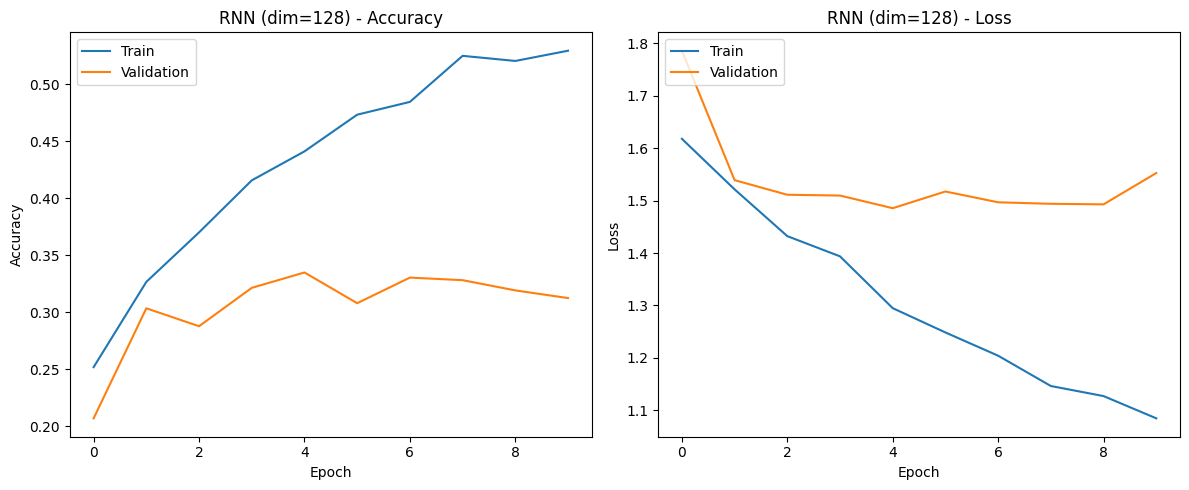

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
RNN_128 Performance:
Accuracy: 0.3348
Precision: 0.3419
Recall: 0.3348
F1 Score: 0.2791

Classification Report:
               precision    recall  f1-score   support

     business       0.29      0.06      0.10       102
entertainment       0.09      0.03      0.04        77
     politics       0.53      0.31      0.39        84
        sport       0.29      0.84      0.43       102
         tech       0.53      0.36      0.43        80

     accuracy                           0.33       445
    macro avg       0.34      0.32      0.28       445
 weighted avg       0.34      0.33      0.28       445



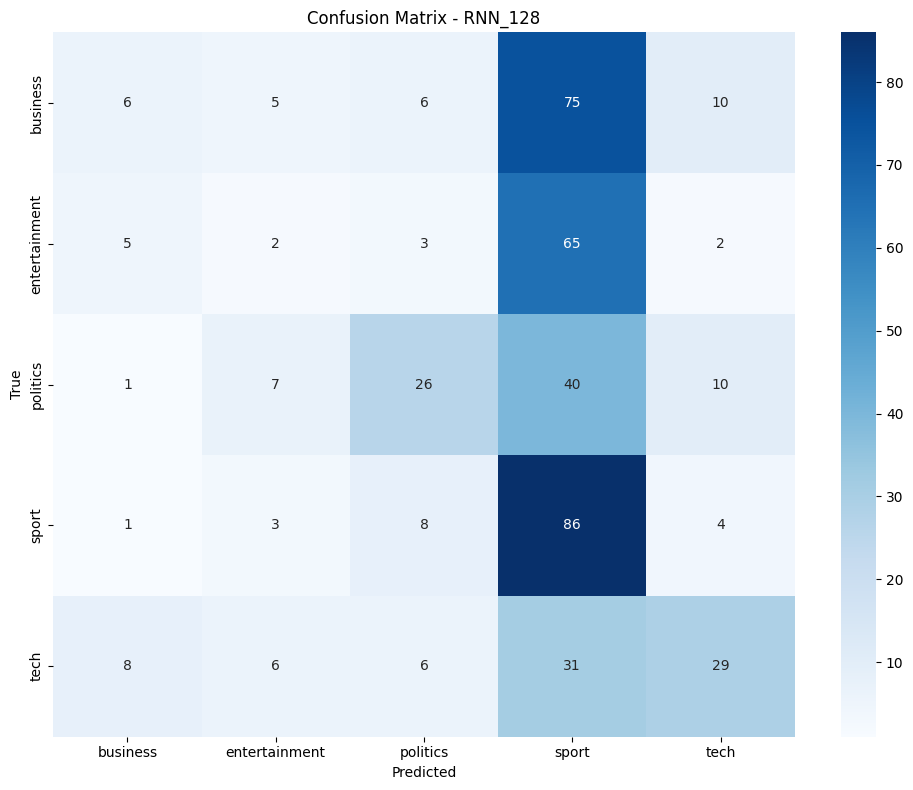


Training RNN model with hidden dim 256

RNN Model with hidden dimension 256:


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_20 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.2663 - loss: 1.6248

42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 354ms/step - accuracy: 0.2668 - loss: 1.6242 - val_accuracy: 0.2607 - val_loss: 1.5826
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 348ms/step - accuracy: 0.3705 - loss: 1.4819 - val_accuracy: 0.2876 - val_loss: 1.6007
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step - accuracy: 0.3099 - loss: 1.5766 - val_accuracy: 0.2674 - val_loss: 1.5963
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.2490 - loss: 1.7248

42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 348ms/step - accuracy: 0.2489 - loss: 1.7249 - val_accuracy: 0.3079 - val_loss: 1.5663
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.2812 - loss: 1.6641

42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 347ms/step - accuracy: 0.2812 - loss: 1.6644 - val_accuracy: 0.2584 - val_loss: 1.5557
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 348ms/step - accuracy: 0.2630 - loss: 1.6815 - val_accuracy: 0.3393 - val_loss: 1.5587
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.3033 - loss: 1.5921

42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.3034 - loss: 1.5916 - val_accuracy: 0.3079 - val_loss: 1.5532
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3716 - loss: 1.4811

42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 347ms/step - accuracy: 0.3716 - loss: 1.4815 - val_accuracy: 0.3483 - val_loss: 1.4549
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 350ms/step - accuracy: 0.3808 - loss: 1.4541 - val_accuracy: 0.3236 - val_loss: 1.5488
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - accuracy: 0.2486 - loss: 1.7241 - val_accuracy: 0.2787 - val_loss: 1.5862
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.2139 - loss: 1.7225 - val_accuracy: 0.2742 - val_loss: 1.5753
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 346ms/step - accuracy: 0.2504 - loss: 1.6995 - val_accuracy: 0.2719 - val_loss: 1.5483
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step - accuracy: 0.3072 - loss: 1.6277 - val_accuracy: 0.3236 - val_loss: 1.5275


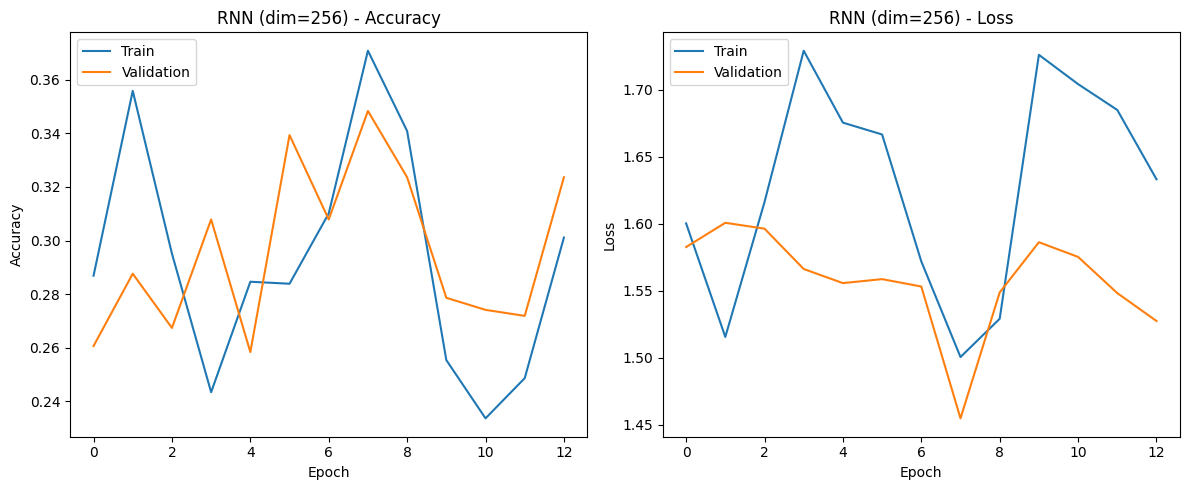

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
RNN_256 Performance:
Accuracy: 0.3506
Precision: 0.4296
Recall: 0.3506
F1 Score: 0.3098

Classification Report:
               precision    recall  f1-score   support

     business       0.29      0.83      0.43       102
entertainment       0.34      0.13      0.19        77
     politics       0.65      0.24      0.35        84
        sport       0.42      0.10      0.16       102
         tech       0.48      0.39      0.43        80

     accuracy                           0.35       445
    macro avg       0.44      0.34      0.31       445
 weighted avg       0.43      0.35      0.31       445



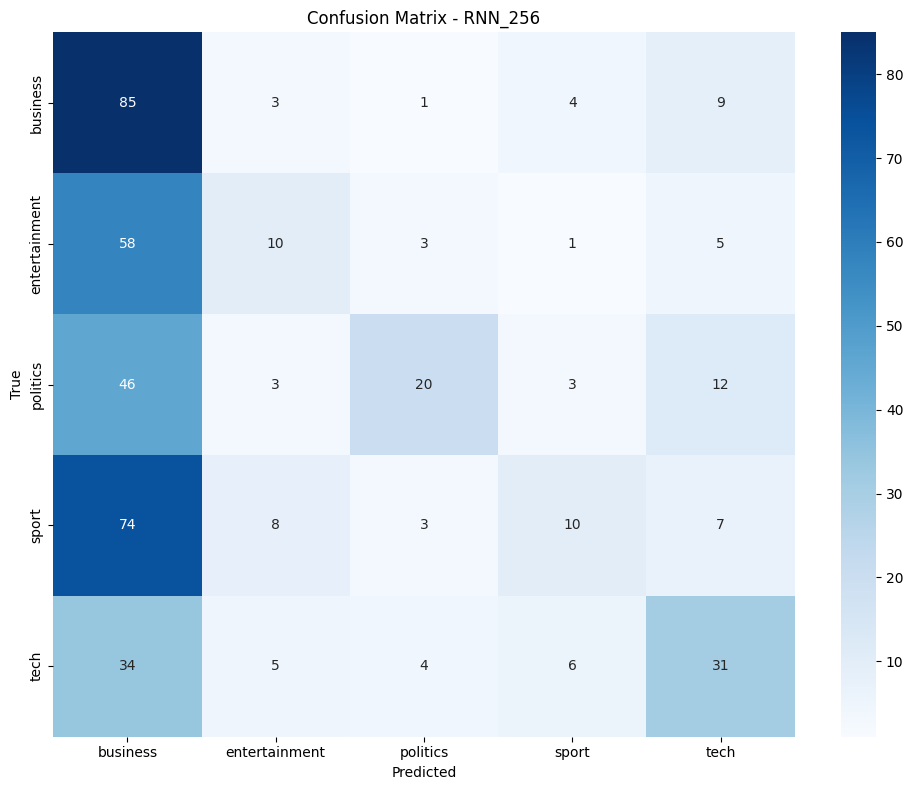


Training RNN model with hidden dim 512

RNN Model with hidden dimension 512:


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_21 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.2460 - loss: 1.7082

42/42 ━━━━━━━━━━━━━━━━━━━━ 33s 729ms/step - accuracy: 0.2469 - loss: 1.7077 - val_accuracy: 0.2899 - val_loss: 1.5186
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 743ms/step - accuracy: 0.3285 - loss: 1.6162 - val_accuracy: 0.3146 - val_loss: 1.6097
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 825ms/step - accuracy: 0.3248 - loss: 1.5974 - val_accuracy: 0.2427 - val_loss: 1.6302
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 736ms/step - accuracy: 0.2223 - loss: 1.8334 - val_accuracy: 0.1303 - val_loss: 1.7456
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 771ms/step - accuracy: 0.2222 - loss: 1.8672 - val_accuracy: 0.2247 - val_loss: 1.6927
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 769ms/step - accuracy: 0.2067 - loss: 1.8704 - val_accuracy: 0.1910 - val_loss: 1.6777


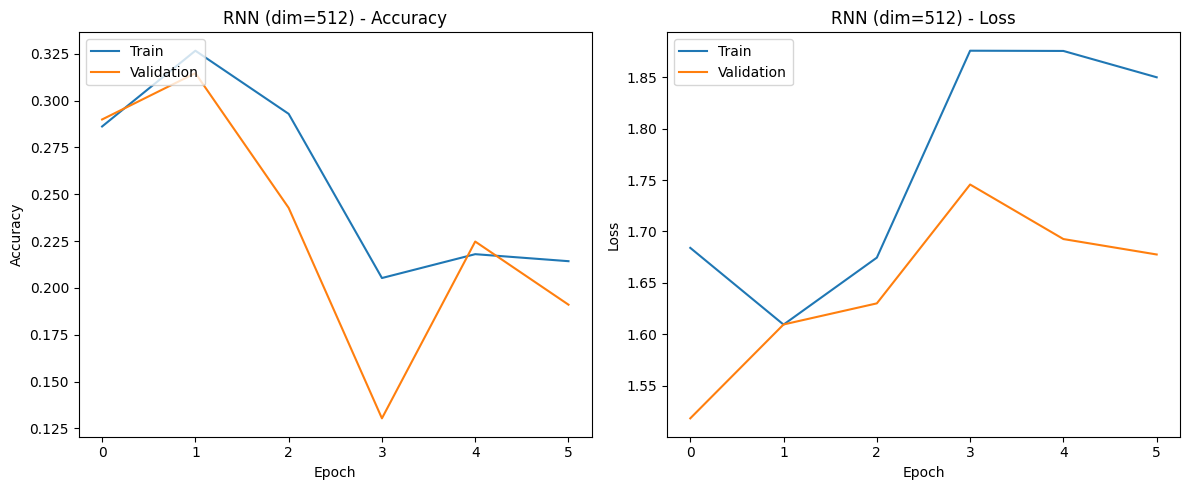

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step
RNN_512 Performance:
Accuracy: 0.2854
Precision: 0.3388
Recall: 0.2854
F1 Score: 0.1613

Classification Report:
               precision    recall  f1-score   support

     business       0.00      0.00      0.00       102
entertainment       0.00      0.00      0.00        77
     politics       0.23      0.73      0.35        84
        sport       1.00      0.01      0.02       102
         tech       0.37      0.81      0.51        80

     accuracy                           0.29       445
    macro avg       0.32      0.31      0.17       445
 weighted avg       0.34      0.29      0.16       445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



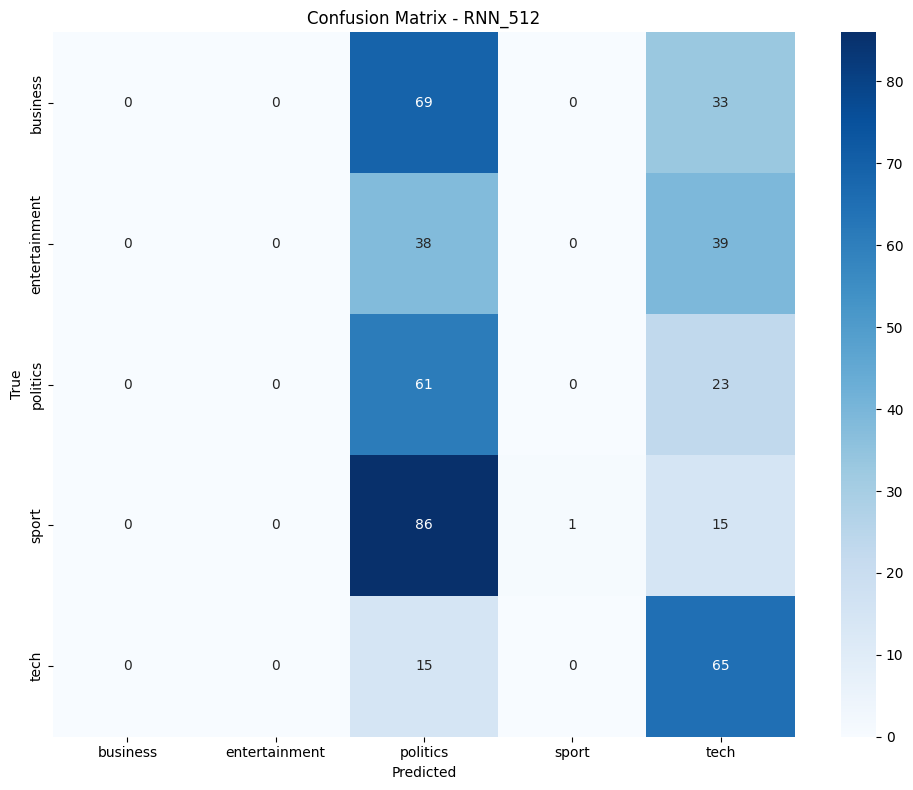


Training LSTM model with hidden dim 128

LSTM Model with hidden dimension 128:


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.2723 - loss: 1.5431

42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 496ms/step - accuracy: 0.2741 - loss: 1.5408 - val_accuracy: 0.5281 - val_loss: 1.1212
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step - accuracy: 0.5249 - loss: 1.2028 - val_accuracy: 0.4652 - val_loss: 1.1723
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.5140 - loss: 1.2314

42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 530ms/step - accuracy: 0.5142 - loss: 1.2305 - val_accuracy: 0.6045 - val_loss: 1.0077
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6392 - loss: 0.8933

42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 513ms/step - accuracy: 0.6395 - loss: 0.8930 - val_accuracy: 0.6809 - val_loss: 0.8687
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.6871 - loss: 1.0556

42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 545ms/step - accuracy: 0.6860 - loss: 1.0562 - val_accuracy: 0.6719 - val_loss: 0.8569
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 512ms/step - accuracy: 0.6939 - loss: 0.8381 - val_accuracy: 0.7281 - val_loss: 0.9167
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 576ms/step - accuracy: 0.6624 - loss: 1.0901 - val_accuracy: 0.5865 - val_loss: 1.0856
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.5997 - loss: 1.0446

42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 511ms/step - accuracy: 0.6016 - loss: 1.0411 - val_accuracy: 0.7663 - val_loss: 0.7247
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 524ms/step - accuracy: 0.7680 - loss: 0.6770 - val_accuracy: 0.7618 - val_loss: 0.7646
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 545ms/step - accuracy: 0.5231 - loss: 1.2200 - val_accuracy: 0.5303 - val_loss: 1.2242
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 538ms/step - accuracy: 0.5458 - loss: 1.1209 - val_accuracy: 0.6315 - val_loss: 0.9693
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6766 - loss: 0.8416

42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 508ms/step - accuracy: 0.6768 - loss: 0.8409 - val_accuracy: 0.6787 - val_loss: 0.6894
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.7728 - loss: 0.5809

42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 520ms/step - accuracy: 0.7736 - loss: 0.5802 - val_accuracy: 0.8337 - val_loss: 0.5395
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 502ms/step - accuracy: 0.7814 - loss: 0.6886 - val_accuracy: 0.7213 - val_loss: 0.8750
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 509ms/step - accuracy: 0.6479 - loss: 1.1050 - val_accuracy: 0.6494 - val_loss: 0.9360


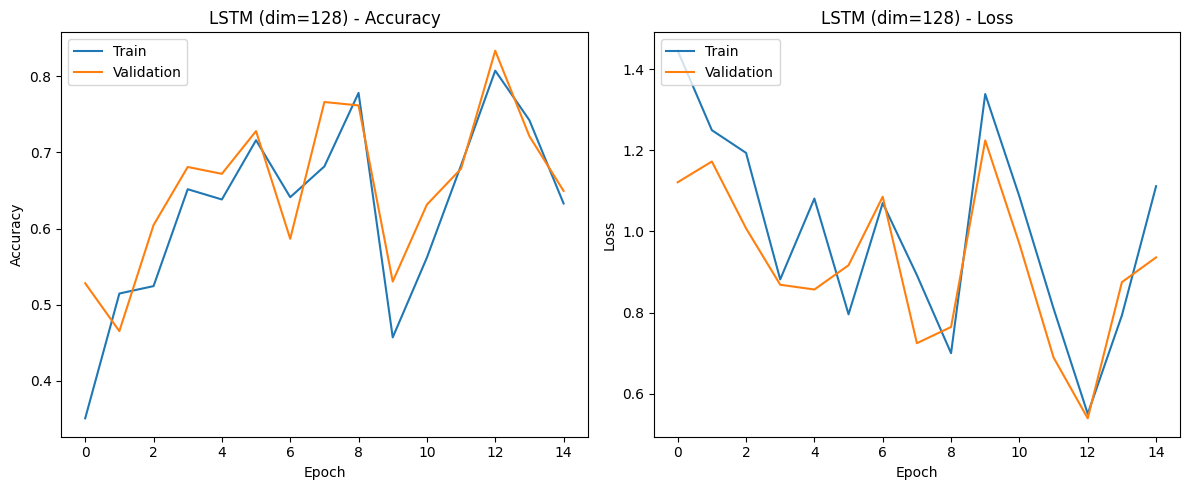

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
LSTM_128 Performance:
Accuracy: 0.8539
Precision: 0.8645
Recall: 0.8539
F1 Score: 0.8530

Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.84      0.91       102
entertainment       0.84      0.74      0.79        77
     politics       0.89      0.74      0.81        84
        sport       0.85      0.97      0.91       102
         tech       0.74      0.95      0.83        80

     accuracy                           0.85       445
    macro avg       0.86      0.85      0.85       445
 weighted avg       0.86      0.85      0.85       445



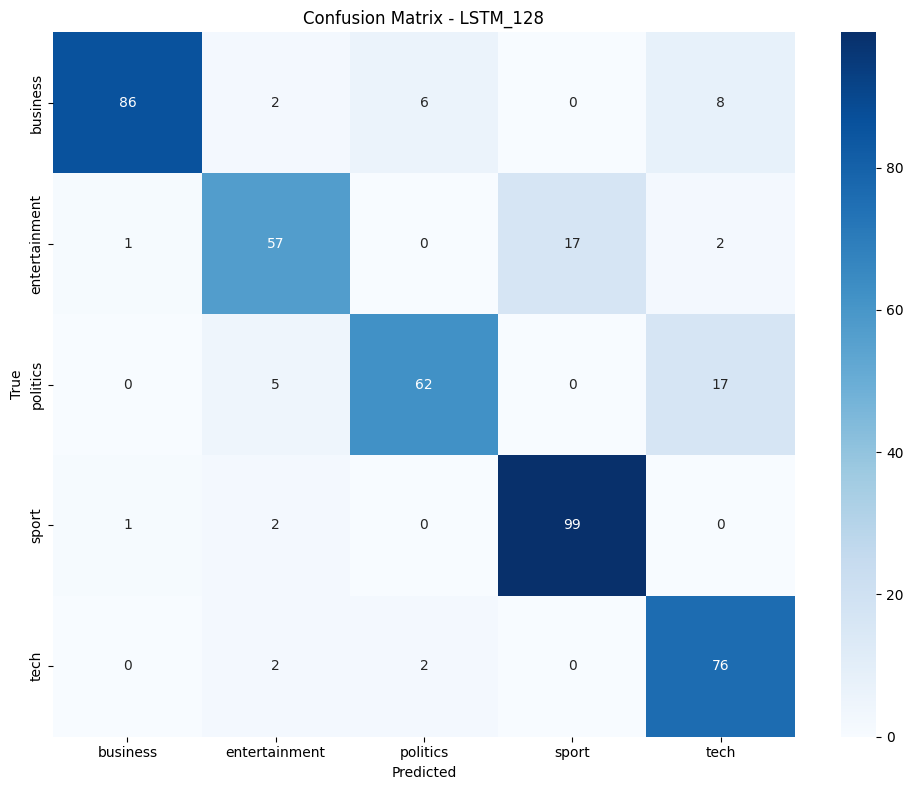


Training LSTM model with hidden dim 256

LSTM Model with hidden dimension 256:


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.3484 - loss: 1.4866

42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.3495 - loss: 1.4852 - val_accuracy: 0.3618 - val_loss: 1.4163
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.4129 - loss: 1.2931

42/42 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4134 - loss: 1.2929 - val_accuracy: 0.4112 - val_loss: 1.3963
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.4241 - loss: 1.3853

42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4243 - loss: 1.3843 - val_accuracy: 0.4472 - val_loss: 1.2876
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.4873 - loss: 1.1925

42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4882 - loss: 1.1917 - val_accuracy: 0.5101 - val_loss: 1.1735
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.5696 - loss: 1.0491

42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5695 - loss: 1.0486 - val_accuracy: 0.5483 - val_loss: 1.1027
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.5815 - loss: 1.0059

42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5815 - loss: 1.0059 - val_accuracy: 0.5685 - val_loss: 0.9536
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5491 - loss: 1.0552 - val_accuracy: 0.4360 - val_loss: 1.2118
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5143 - loss: 1.1396 - val_accuracy: 0.3820 - val_loss: 1.3602
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4579 - loss: 1.1982 - val_accuracy: 0.5213 - val_loss: 1.1089
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.5841 - loss: 0.9846

42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5851 - loss: 0.9830 - val_accuracy: 0.6382 - val_loss: 0.8571
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6936 - loss: 0.7264 - val_accuracy: 0.5933 - val_loss: 0.9035
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.6373 - loss: 0.8695

42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6384 - loss: 0.8671 - val_accuracy: 0.6921 - val_loss: 0.7505
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7291 - loss: 0.6431 - val_accuracy: 0.5236 - val_loss: 1.3677
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5718 - loss: 1.1071 - val_accuracy: 0.5281 - val_loss: 1.0349
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6398 - loss: 0.8393 - val_accuracy: 0.6067 - val_loss: 0.8352


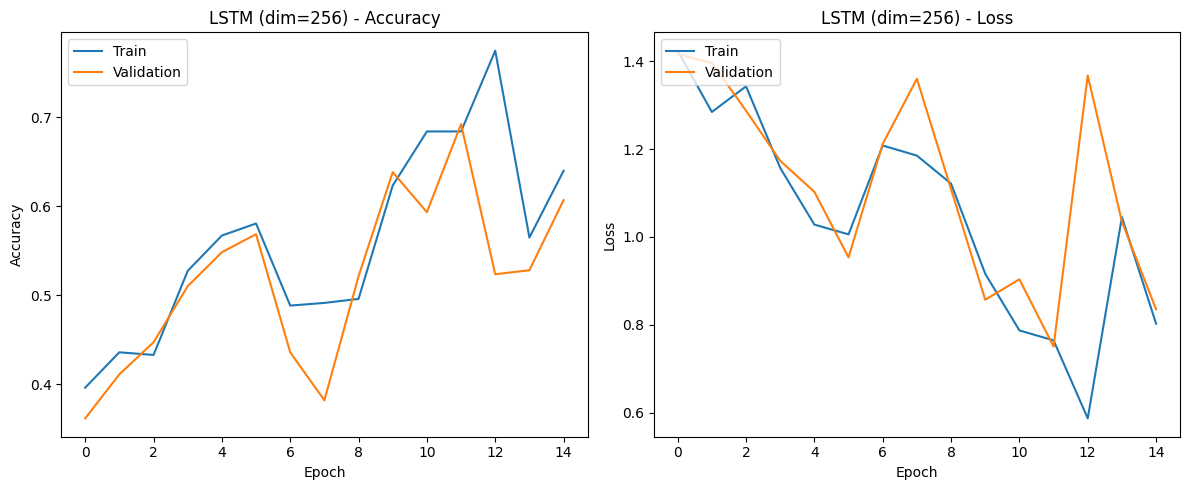

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step
LSTM_256 Performance:
Accuracy: 0.6764
Precision: 0.7754
Recall: 0.6764
F1 Score: 0.6667

Classification Report:
               precision    recall  f1-score   support

     business       0.44      0.98      0.61       102
entertainment       0.59      0.17      0.26        77
     politics       1.00      0.63      0.77        84
        sport       1.00      0.90      0.95       102
         tech       0.86      0.54      0.66        80

     accuracy                           0.68       445
    macro avg       0.78      0.64      0.65       445
 weighted avg       0.78      0.68      0.67       445



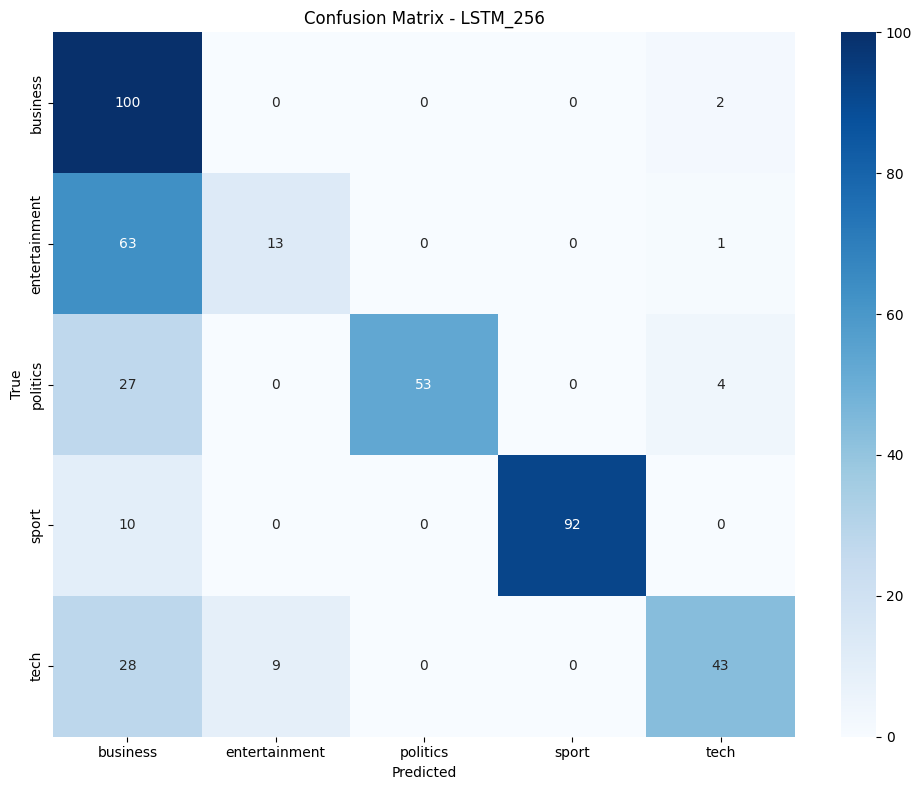


Training LSTM model with hidden dim 512

LSTM Model with hidden dimension 512:


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3283 - loss: 1.5581

42/42 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.3281 - loss: 1.5588 - val_accuracy: 0.3213 - val_loss: 1.5209
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3506 - loss: 1.5182

42/42 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.3511 - loss: 1.5174 - val_accuracy: 0.4135 - val_loss: 1.3234
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4608 - loss: 1.2727

42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.4610 - loss: 1.2731 - val_accuracy: 0.4697 - val_loss: 1.2859
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.4326 - loss: 1.3062 - val_accuracy: 0.4022 - val_loss: 1.3346
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.3905 - loss: 1.5330 - val_accuracy: 0.3079 - val_loss: 1.5880
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.4173 - loss: 1.3879 - val_accuracy: 0.4337 - val_loss: 1.2900
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4584 - loss: 1.2845

42/42 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4587 - loss: 1.2836 - val_accuracy: 0.4854 - val_loss: 1.2173
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.4186 - loss: 1.3590 - val_accuracy: 0.3393 - val_loss: 1.4383
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3939 - loss: 1.4386

42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.3949 - loss: 1.4367 - val_accuracy: 0.5326 - val_loss: 1.1773
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.4972 - loss: 1.2221 - val_accuracy: 0.5011 - val_loss: 1.2612
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5129 - loss: 1.2723 - val_accuracy: 0.4809 - val_loss: 1.3111
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4772 - loss: 1.2710 - val_accuracy: 0.5303 - val_loss: 1.1852
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5196 - loss: 1.0856

42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.5202 - loss: 1.0851 - val_accuracy: 0.5618 - val_loss: 1.1122
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.5904 - loss: 1.0191 - val_accuracy: 0.3438 - val_loss: 2.2914
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4120 - loss: 1.4967

42/42 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.4136 - loss: 1.4927 - val_accuracy: 0.6022 - val_loss: 1.0768


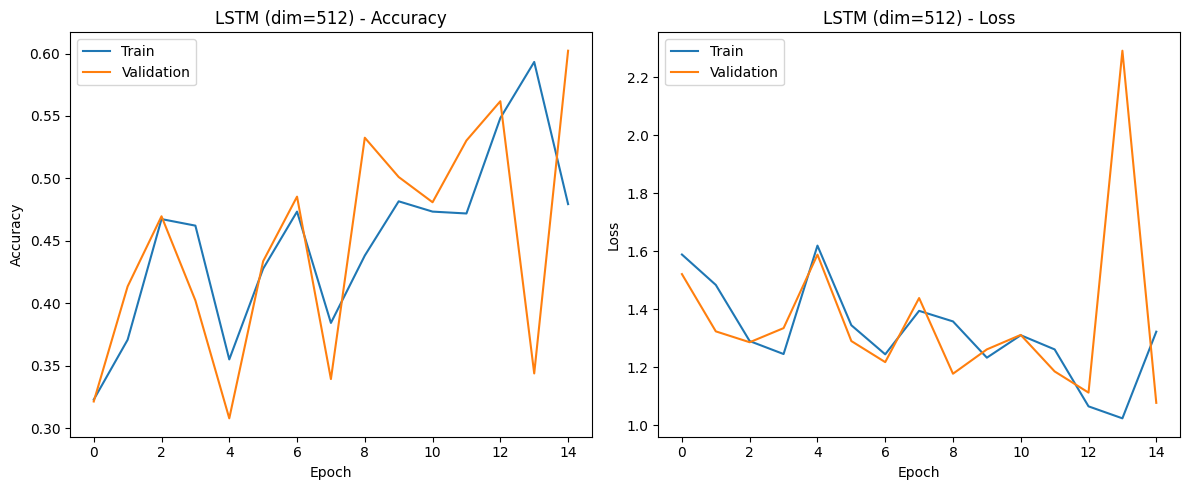

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 711ms/step
LSTM_512 Performance:
Accuracy: 0.5640
Precision: 0.7414
Recall: 0.5640
F1 Score: 0.5400

Classification Report:
               precision    recall  f1-score   support

     business       0.36      0.86      0.51       102
entertainment       1.00      0.03      0.05        77
     politics       0.57      0.44      0.50        84
        sport       0.96      0.72      0.82       102
         tech       0.88      0.64      0.74        80

     accuracy                           0.56       445
    macro avg       0.75      0.54      0.52       445
 weighted avg       0.74      0.56      0.54       445



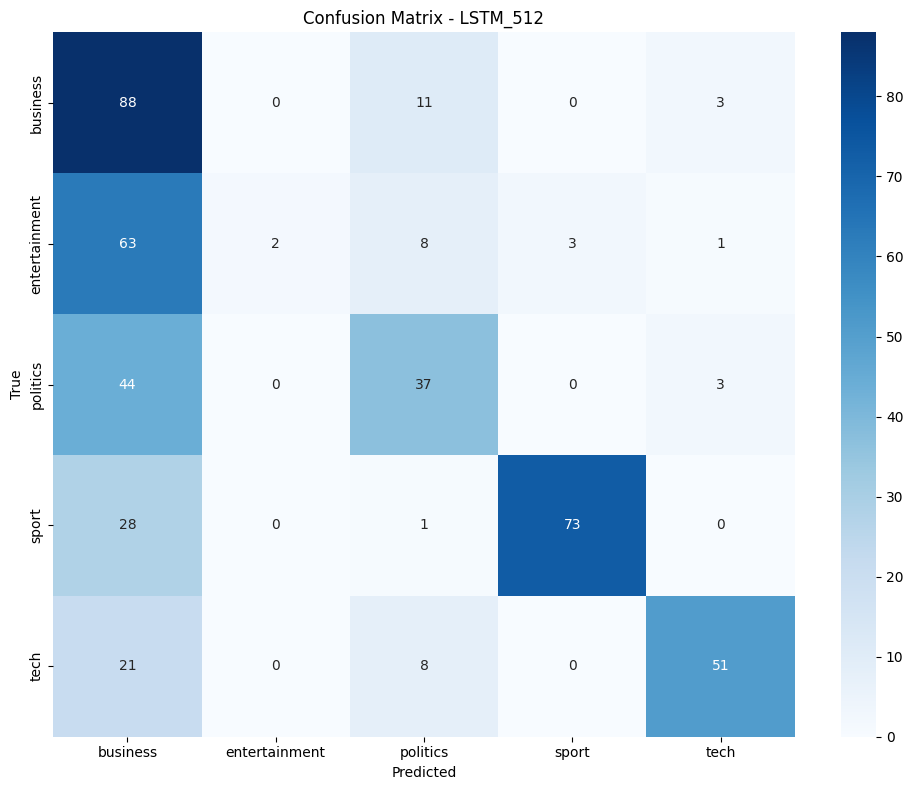

In [101]:
for model_type in ['RNN', 'LSTM']:
    for hidden_dim in hidden_dims:
        print(f"\n{'='*50}")
        print(f"Training {model_type} model with hidden dim {hidden_dim}")
        print(f"{'='*50}\n")

        model, history = create_and_train_model(
            model_type, hidden_dim,
            X_train_pad, y_train_np,
            X_val_pad, y_val_np,
            embedding_matrix
        )

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'{model_type} (dim={hidden_dim}) - Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'{model_type} (dim={hidden_dim}) - Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        plt.tight_layout()
        plt.savefig(f'{model_type}_{hidden_dim}_training_history.png')
        plt.show()

        model_name = f"{model_type}_{hidden_dim}"
        eval_results = evaluate_model(model, X_test_pad, y_test_np, model_name)
        results[model_name] = eval_results


Model Comparison Results:
  Model_Type  Hidden_Dim  accuracy  precision    recall        f1
0        RNN         128  0.334831   0.341859  0.334831  0.279132
1        RNN         256  0.350562   0.429634  0.350562  0.309751
2        RNN         512  0.285393   0.338792  0.285393  0.161339
3       LSTM         128  0.853933   0.864510  0.853933  0.853037
4       LSTM         256  0.676404   0.775364  0.676404  0.666738
5       LSTM         512  0.564045   0.741395  0.564045  0.539988


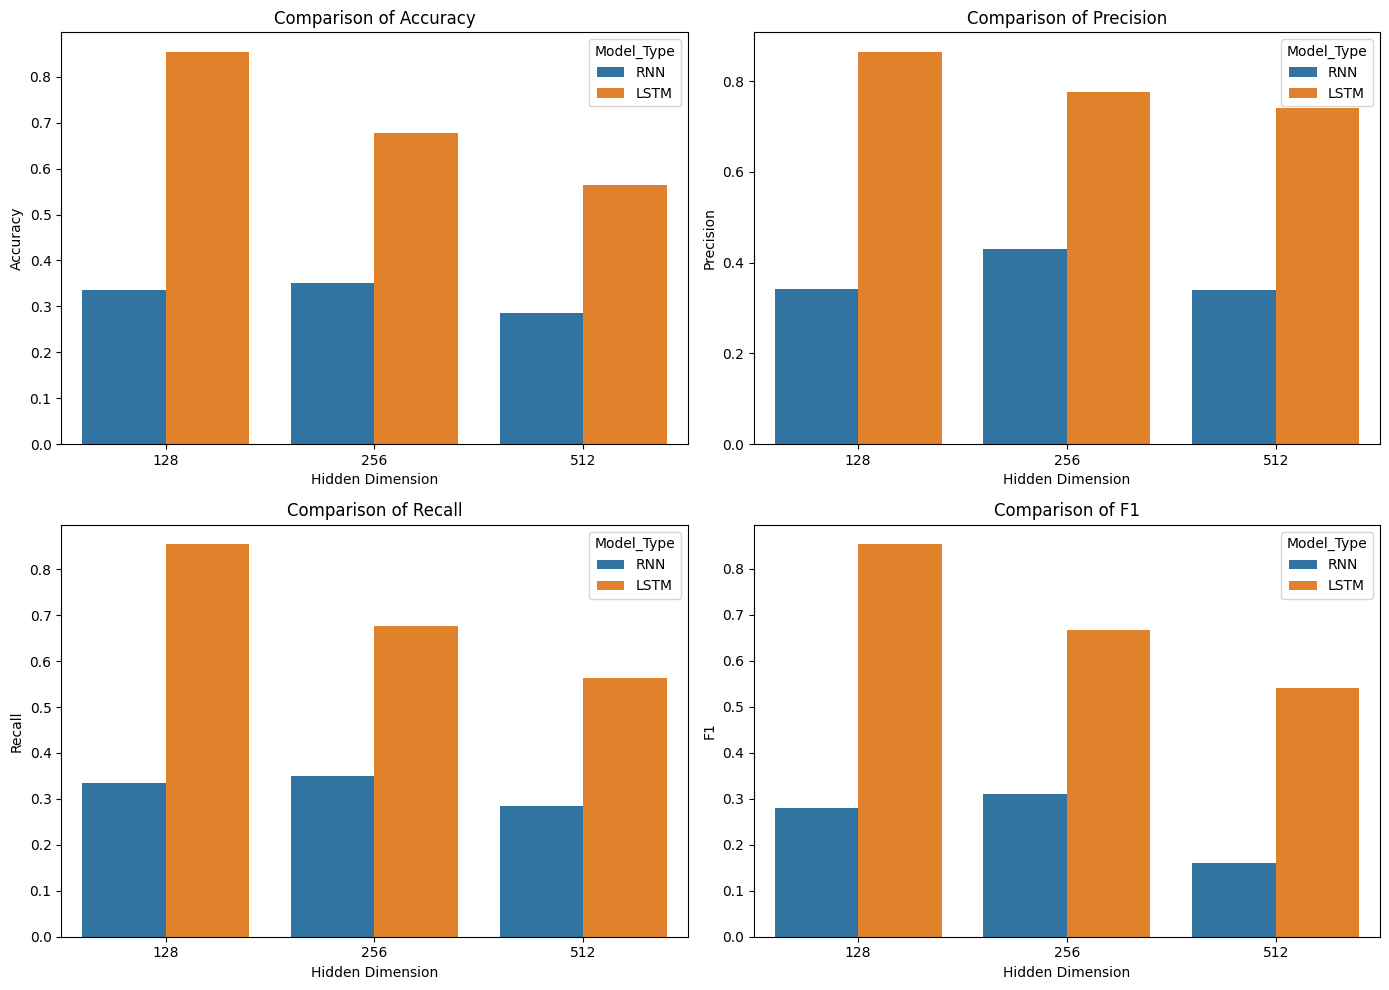

In [102]:
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df = results_df.reset_index()
results_df[['Model_Type', 'Hidden_Dim']] = results_df['Model'].str.split('_', expand=True)
results_df = results_df[['Model_Type', 'Hidden_Dim', 'accuracy', 'precision', 'recall', 'f1']]
results_df['Hidden_Dim'] = results_df['Hidden_Dim'].astype(int)

print("\nModel Comparison Results:")
print(results_df)

plt.figure(figsize=(14, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Hidden_Dim', y=metric, hue='Model_Type', data=results_df)
    plt.title(f'Comparison of {metric.capitalize()}')
    plt.xlabel('Hidden Dimension')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

In [125]:
def visualize_hidden_states(model, text_samples, category_samples, model_name):
    from tensorflow.keras.models import Model
    from tensorflow.keras import Input
    from sklearn.decomposition import PCA

    sequences = tokenizer.texts_to_sequences(text_samples)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

    target_layer = None
    for layer in model.layers[::-1]:
        if isinstance(layer, tf.keras.layers.LSTM) or isinstance(layer, tf.keras.layers.SimpleRNN):
            target_layer = layer
            break

    if target_layer is None:
        print(f"❌ Tidak ditemukan RNN/LSTM layer dalam model {model_name}")
        return

    input_tensor = Input(shape=(MAX_SEQUENCE_LENGTH,))
    x = model.layers[0](input_tensor)  # Embedding
    for l in model.layers[1:]:
        x = l(x)
        if l == target_layer:
            break

    hidden_model = Model(inputs=input_tensor, outputs=x)

    hidden_states = hidden_model.predict(padded_sequences)

    if len(hidden_states.shape) == 3:
        hidden_states = hidden_states[:, -1, :]

    reduced = PCA(n_components=2).fit_transform(hidden_states)

    plt.figure(figsize=(10, 8))
    unique_categories = list(set(category_samples))
    for cat in unique_categories:
        idx = [i for i, c in enumerate(category_samples) if c == cat]
        plt.scatter(reduced[idx, 0], reduced[idx, 1], label=cat)

    plt.title(f"PCA of Hidden States - {model_name}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{model_name}_hidden_states.png")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


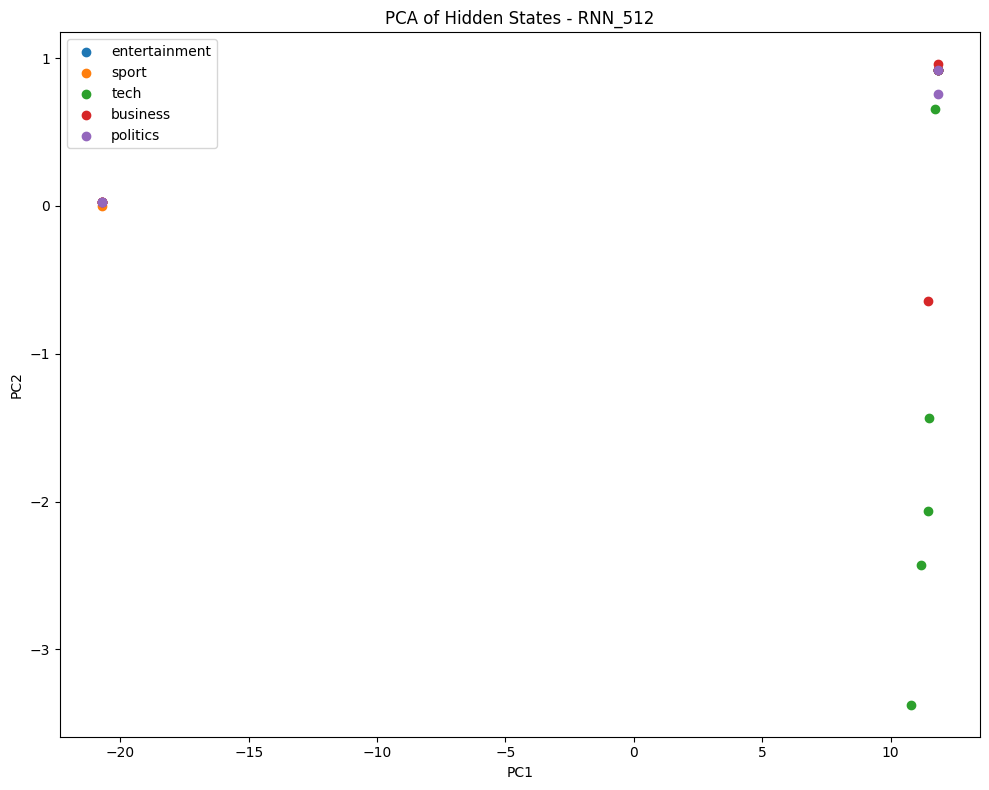

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


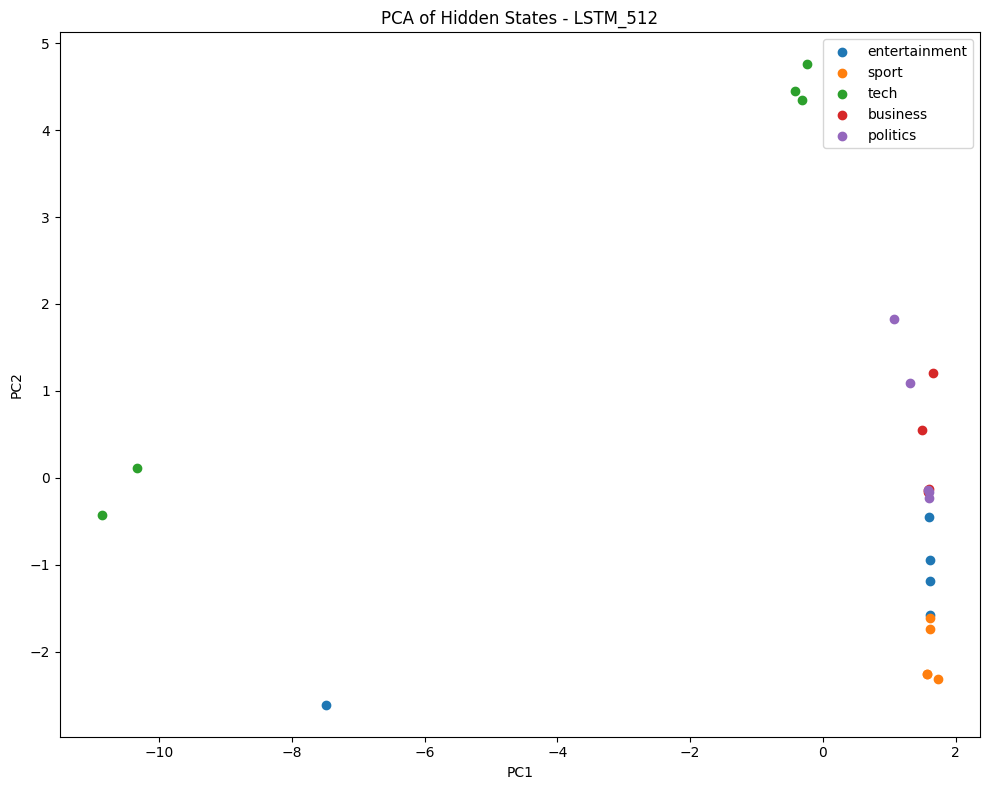


Testing sequence length: 100
RNN Model with hidden dimension 128:


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_24 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2534 - loss: 1.6851

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.2572 - loss: 1.6782 - val_accuracy: 0.5213 - val_loss: 1.1474
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.6424 - loss: 0.9868 - val_accuracy: 0.4562 - val_loss: 1.6252
Epoch 3/15
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5806 - loss: 1.1775

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5818 - loss: 1.1740 - val_accuracy: 0.6876 - val_loss: 0.8377
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7379 - loss: 0.7271 - val_accuracy: 0.4584 - val_loss: 1.3539
Epoch 5/15
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6804 - loss: 0.8548

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6828 - loss: 0.8491 - val_accuracy: 0.6944 - val_loss: 0.8080
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8591 - loss: 0.4412

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8592 - loss: 0.4410 - val_accuracy: 0.7596 - val_loss: 0.6652
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9014 - loss: 0.3259 - val_accuracy: 0.7573 - val_loss: 0.6910
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8905 - loss: 0.3322

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8909 - loss: 0.3315 - val_accuracy: 0.8112 - val_loss: 0.5868
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9370 - loss: 0.2001

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9375 - loss: 0.1992 - val_accuracy: 0.8270 - val_loss: 0.5491
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9669 - loss: 0.1237 - val_accuracy: 0.7753 - val_loss: 0.7009
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9455 - loss: 0.1783 - val_accuracy: 0.8247 - val_loss: 0.5668
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9856 - loss: 0.0831 - val_accuracy: 0.8315 - val_loss: 0.5521
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9710 - loss: 0.0894 - val_accuracy: 0.8292 - val_loss: 0.5985
Epoch 14/15
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9956 - loss: 0.0360

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9957 - loss: 0.0357 - val_accuracy: 0.8517 - val_loss: 0.5203
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9914 - loss: 0.0449 - val_accuracy: 0.8180 - val_loss: 0.6259
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
RNN with sequence length 100: Accuracy = 0.8270
LSTM Model with hidden dimension 128:


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.4214 - loss: 1.3856

42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.4250 - loss: 1.3791 - val_accuracy: 0.8360 - val_loss: 0.6203
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8610 - loss: 0.4661

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.8612 - loss: 0.4653 - val_accuracy: 0.8629 - val_loss: 0.4389
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9090 - loss: 0.3401

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.9092 - loss: 0.3401 - val_accuracy: 0.9146 - val_loss: 0.3679
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9371 - loss: 0.2534

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.9372 - loss: 0.2531 - val_accuracy: 0.9101 - val_loss: 0.2726
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.8943 - loss: 0.4044 - val_accuracy: 0.7101 - val_loss: 1.0711
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.7025 - loss: 0.9273 - val_accuracy: 0.8787 - val_loss: 0.5863
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.9259 - loss: 0.3704 - val_accuracy: 0.9101 - val_loss: 0.2893
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9659 - loss: 0.1519

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.9660 - loss: 0.1517 - val_accuracy: 0.9236 - val_loss: 0.2597
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.9771 - loss: 0.1021 - val_accuracy: 0.9191 - val_loss: 0.2653
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9764 - loss: 0.1098

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.9764 - loss: 0.1094 - val_accuracy: 0.9393 - val_loss: 0.1987
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9929 - loss: 0.0557

42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9928 - loss: 0.0557 - val_accuracy: 0.9461 - val_loss: 0.1851
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.9908 - loss: 0.0528 - val_accuracy: 0.9393 - val_loss: 0.2364
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.9875 - loss: 0.0492 - val_accuracy: 0.9528 - val_loss: 0.1966
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9904 - loss: 0.0446 - val_accuracy: 0.9416 - val_loss: 0.2160
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.9936 - loss: 0.0407 - val_accuracy: 0.9506 - val_loss: 0.2248
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
LSTM with sequence length 100: Accuracy = 0.9551

Testing sequence length: 200
RNN Model with hidden dimension 128:


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_25 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2577 - loss: 1.6318

42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.2583 - loss: 1.6308 - val_accuracy: 0.3933 - val_loss: 1.4490
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.3915 - loss: 1.3855

42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.3923 - loss: 1.3845 - val_accuracy: 0.4629 - val_loss: 1.3260
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4780 - loss: 1.2629

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4786 - loss: 1.2616 - val_accuracy: 0.4742 - val_loss: 1.2972
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.6021 - loss: 1.1200 - val_accuracy: 0.3798 - val_loss: 1.4405
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.5553 - loss: 1.1295 - val_accuracy: 0.3955 - val_loss: 1.3675
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6096 - loss: 0.9706

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6096 - loss: 0.9707 - val_accuracy: 0.4517 - val_loss: 1.1899
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.6726 - loss: 0.8454 - val_accuracy: 0.3730 - val_loss: 1.4917
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.6370 - loss: 0.9849 - val_accuracy: 0.3708 - val_loss: 1.4062
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.6069 - loss: 0.9339 - val_accuracy: 0.4202 - val_loss: 1.4304
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.6557 - loss: 0.8665 - val_accuracy: 0.3820 - val_loss: 1.4313
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.6852 - loss: 0.8153 - val_accuracy: 0.3978 - val_loss: 1.6185
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
RNN with sequence length 200: Accuracy = 0.4382
LSTM Model with hidden dimension 128:


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.3493 - loss: 1.4686

42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.3520 - loss: 1.4646 - val_accuracy: 0.6607 - val_loss: 0.9419
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.6681 - loss: 0.9767

42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 397ms/step - accuracy: 0.6687 - loss: 0.9750 - val_accuracy: 0.7483 - val_loss: 0.7162
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 405ms/step - accuracy: 0.8083 - loss: 0.6500 - val_accuracy: 0.6562 - val_loss: 0.8210
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7414 - loss: 0.7051

42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - accuracy: 0.7420 - loss: 0.7042 - val_accuracy: 0.7978 - val_loss: 0.6146
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 418ms/step - accuracy: 0.8417 - loss: 0.5374 - val_accuracy: 0.6831 - val_loss: 1.4494
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 404ms/step - accuracy: 0.6721 - loss: 1.1606 - val_accuracy: 0.5348 - val_loss: 1.1565
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.5553 - loss: 1.1812 - val_accuracy: 0.5191 - val_loss: 1.1433
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 401ms/step - accuracy: 0.5478 - loss: 1.0679 - val_accuracy: 0.6494 - val_loss: 0.9295
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 405ms/step - accuracy: 0.6493 - loss: 0.8160 - val_accuracy: 0.7124 - val_loss: 0.7493
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
LSTM with sequence length 200: Accuracy = 0.8247

Testing sequence length: 250
RNN Model with hidden dimension 128:


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_26 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2295 - loss: 1.6565

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.2305 - loss: 1.6554 - val_accuracy: 0.3101 - val_loss: 1.5219
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3236 - loss: 1.5046

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.3237 - loss: 1.5043 - val_accuracy: 0.3124 - val_loss: 1.5002
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.4082 - loss: 1.3778 - val_accuracy: 0.3079 - val_loss: 1.5047
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4199 - loss: 1.3466

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.4202 - loss: 1.3458 - val_accuracy: 0.5348 - val_loss: 1.1653
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.4342 - loss: 1.4401 - val_accuracy: 0.3056 - val_loss: 1.5448
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3305 - loss: 1.5863 - val_accuracy: 0.3169 - val_loss: 1.5144
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.3627 - loss: 1.4893 - val_accuracy: 0.3371 - val_loss: 1.4913
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.3775 - loss: 1.4567 - val_accuracy: 0.4427 - val_loss: 1.3256
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.4188 - loss: 1.3564 - val_accuracy: 0.3326 - val_loss: 1.5066
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
RNN with sequence length 250: Accuracy = 0.5146
LSTM Model with hidden dimension 128:


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.2988 - loss: 1.5361

42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 478ms/step - accuracy: 0.3004 - loss: 1.5340 - val_accuracy: 0.4719 - val_loss: 1.2525
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.5322 - loss: 1.1065

42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 483ms/step - accuracy: 0.5322 - loss: 1.1069 - val_accuracy: 0.6225 - val_loss: 1.0452
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.6473 - loss: 0.9141

42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - accuracy: 0.6478 - loss: 0.9127 - val_accuracy: 0.6921 - val_loss: 0.7914
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6449 - loss: 0.7917

42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 484ms/step - accuracy: 0.6457 - loss: 0.7912 - val_accuracy: 0.7303 - val_loss: 0.6968
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.6887 - loss: 0.8018 - val_accuracy: 0.4697 - val_loss: 1.2780
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - accuracy: 0.4685 - loss: 1.4104 - val_accuracy: 0.5371 - val_loss: 1.1385
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 0.5687 - loss: 1.0470 - val_accuracy: 0.5483 - val_loss: 1.1805
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 469ms/step - accuracy: 0.6305 - loss: 1.0131 - val_accuracy: 0.6921 - val_loss: 0.8582
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 536ms/step - accuracy: 0.7316 - loss: 0.7761 - val_accuracy: 0.7326 - val_loss: 0.7640
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
LSTM with sequence length 250: Accuracy = 0.7034

Testing sequence length: 300
RNN Model with hidden dimension 128:


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_27 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.2374 - loss: 1.6400

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.2373 - loss: 1.6399 - val_accuracy: 0.2787 - val_loss: 1.5521
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3092 - loss: 1.5481

42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.3091 - loss: 1.5479 - val_accuracy: 0.2831 - val_loss: 1.5290
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.3202 - loss: 1.5039 - val_accuracy: 0.2944 - val_loss: 1.5475
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.3330 - loss: 1.4859 - val_accuracy: 0.2629 - val_loss: 1.5551
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.3411 - loss: 1.4554 - val_accuracy: 0.1978 - val_loss: 2.2383
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.2818 - loss: 1.7811 - val_accuracy: 0.2494 - val_loss: 1.5876
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.3350 - loss: 1.5064 - val_accuracy: 0.2944 - val_loss: 1.5570
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
RNN with sequence length 300: Accuracy = 0.2674
LSTM Model with hidden dimension 128:


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.2834 - loss: 1.5823

42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 606ms/step - accuracy: 0.2836 - loss: 1.5820 - val_accuracy: 0.3416 - val_loss: 1.5013
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 612ms/step - accuracy: 0.3461 - loss: 1.4545 - val_accuracy: 0.2225 - val_loss: 1.8631
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.3428 - loss: 1.6598

42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 614ms/step - accuracy: 0.3436 - loss: 1.6562 - val_accuracy: 0.4382 - val_loss: 1.3468
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.3854 - loss: 1.3778

42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 616ms/step - accuracy: 0.3864 - loss: 1.3767 - val_accuracy: 0.5213 - val_loss: 1.1917
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 27s 657ms/step - accuracy: 0.3544 - loss: 1.5806 - val_accuracy: 0.2719 - val_loss: 1.6082
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 611ms/step - accuracy: 0.3435 - loss: 1.5218 - val_accuracy: 0.3798 - val_loss: 1.4023
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 617ms/step - accuracy: 0.3922 - loss: 1.3758 - val_accuracy: 0.3910 - val_loss: 1.3449
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 584ms/step - accuracy: 0.3972 - loss: 1.3075 - val_accuracy: 0.3753 - val_loss: 1.3862
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.3729 - loss: 1.4964

42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 603ms/step - accuracy: 0.3730 - loss: 1.4966 - val_accuracy: 0.5461 - val_loss: 1.1373
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.5479 - loss: 1.0722

42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 643ms/step - accuracy: 0.5478 - loss: 1.0722 - val_accuracy: 0.5888 - val_loss: 1.0274
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 608ms/step - accuracy: 0.4628 - loss: 1.3434 - val_accuracy: 0.3708 - val_loss: 1.4398
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 599ms/step - accuracy: 0.3379 - loss: 1.4907 - val_accuracy: 0.3573 - val_loss: 1.4178
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 613ms/step - accuracy: 0.3567 - loss: 1.3933 - val_accuracy: 0.3775 - val_loss: 1.4124
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 604ms/step - accuracy: 0.3389 - loss: 1.3961 - val_accuracy: 0.3978 - val_loss: 1.3410
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.4603 - loss: 1.2664

42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 638ms/step - accuracy: 0.4614 - loss: 1.2643 - val_accuracy: 0.6337 - val_loss: 0.9722
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step
LSTM with sequence length 300: Accuracy = 0.6067

Testing sequence length: 400
RNN Model with hidden dimension 128:


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_36 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_28 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.1955 - loss: 1.6389

42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - accuracy: 0.1965 - loss: 1.6384 - val_accuracy: 0.2607 - val_loss: 1.7124
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.2450 - loss: 1.6521

42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.2451 - loss: 1.6511 - val_accuracy: 0.2112 - val_loss: 1.5949
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.2424 - loss: 1.6295 - val_accuracy: 0.2404 - val_loss: 1.6196
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.1979 - loss: 1.7618 - val_accuracy: 0.1978 - val_loss: 1.6103
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.2386 - loss: 1.7025 - val_accuracy: 0.2427 - val_loss: 1.6180
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.2460 - loss: 1.6610

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.2461 - loss: 1.6605 - val_accuracy: 0.2472 - val_loss: 1.5874
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.2159 - loss: 1.6374 - val_accuracy: 0.2494 - val_loss: 1.5983
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.2683 - loss: 1.6149 - val_accuracy: 0.2090 - val_loss: 1.5997
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2533 - loss: 1.5899

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.2536 - loss: 1.5897 - val_accuracy: 0.2607 - val_loss: 1.5832
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.2746 - loss: 1.5706 - val_accuracy: 0.2584 - val_loss: 1.5943
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.2495 - loss: 1.5671

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.2497 - loss: 1.5671 - val_accuracy: 0.2472 - val_loss: 1.5827
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.2860 - loss: 1.5399 - val_accuracy: 0.2404 - val_loss: 1.5931
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.2564 - loss: 1.6060 - val_accuracy: 0.2337 - val_loss: 1.6304
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.2353 - loss: 1.6653 - val_accuracy: 0.2494 - val_loss: 1.5921
Epoch 15/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.2298 - loss: 1.6909 - val_accuracy: 0.2472 - val_loss: 1.5955
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
RNN with sequence length 400: Accuracy = 0.2449
LSTM Model with hidden dimension 128:


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_37 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.2072 - loss: 1.6051

42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 837ms/step - accuracy: 0.2079 - loss: 1.6048 - val_accuracy: 0.2719 - val_loss: 1.5672
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 797ms/step - accuracy: 0.2273 - loss: 1.5749 - val_accuracy: 0.2674 - val_loss: 1.5819
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.2647 - loss: 1.5643

42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 798ms/step - accuracy: 0.2646 - loss: 1.5643 - val_accuracy: 0.2787 - val_loss: 1.5523
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.2796 - loss: 1.5308

42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 832ms/step - accuracy: 0.2794 - loss: 1.5310 - val_accuracy: 0.2876 - val_loss: 1.5245
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 819ms/step - accuracy: 0.2500 - loss: 1.5295 - val_accuracy: 0.2742 - val_loss: 1.5423
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 858ms/step - accuracy: 0.2712 - loss: 1.5299 - val_accuracy: 0.2876 - val_loss: 1.5491
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 825ms/step - accuracy: 0.2999 - loss: 1.5124 - val_accuracy: 0.2719 - val_loss: 1.5479
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 826ms/step - accuracy: 0.2727 - loss: 1.4997 - val_accuracy: 0.2831 - val_loss: 1.5406
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 851ms/step - accuracy: 0.2611 - loss: 1.5118 - val_accuracy: 0.2831 - val_loss: 1.5313
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step
LSTM with sequence length 400: Accuracy = 0.2742

Testing sequence length: 500
RNN Model with hidden dimension 128:


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_38 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_29 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.2167 - loss: 1.6720

42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.2168 - loss: 1.6716 - val_accuracy: 0.2292 - val_loss: 1.6142
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.2343 - loss: 1.6256 - val_accuracy: 0.1955 - val_loss: 1.6435
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.2054 - loss: 1.6761 - val_accuracy: 0.2225 - val_loss: 1.6337
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.2093 - loss: 1.7021 - val_accuracy: 0.2067 - val_loss: 1.6220
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.2048 - loss: 1.7103 - val_accuracy: 0.2157 - val_loss: 1.6161
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.1971 - loss: 1.7313 - val_accuracy: 0.2382 - val_loss: 1.6227
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
RNN with sequence length 500: Accuracy = 0.2360
LSTM Model with hidden dimension 128:


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_39 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.2380 - loss: 1.6051

42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 995ms/step - accuracy: 0.2379 - loss: 1.6051 - val_accuracy: 0.2337 - val_loss: 1.6019
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.2386 - loss: 1.5998

42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 940ms/step - accuracy: 0.2385 - loss: 1.5997 - val_accuracy: 0.2315 - val_loss: 1.6011
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.2418 - loss: 1.5903

42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 988ms/step - accuracy: 0.2416 - loss: 1.5904 - val_accuracy: 0.2337 - val_loss: 1.6009
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 943ms/step - accuracy: 0.2363 - loss: 1.5932 - val_accuracy: 0.2337 - val_loss: 1.6040
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 934ms/step - accuracy: 0.2447 - loss: 1.5901 - val_accuracy: 0.2315 - val_loss: 1.6030
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 910ms/step - accuracy: 0.2251 - loss: 1.5938

42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.2253 - loss: 1.5937 - val_accuracy: 0.2360 - val_loss: 1.5953
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2530 - loss: 1.5783 - val_accuracy: 0.2315 - val_loss: 1.6001
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2570 - loss: 1.5840 - val_accuracy: 0.2337 - val_loss: 1.5971
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 912ms/step - accuracy: 0.2426 - loss: 1.5818

42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2425 - loss: 1.5818 - val_accuracy: 0.2360 - val_loss: 1.5915
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2472 - loss: 1.5893 - val_accuracy: 0.2337 - val_loss: 1.6010
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2210 - loss: 1.5897 - val_accuracy: 0.2337 - val_loss: 1.6002
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2656 - loss: 1.5812 - val_accuracy: 0.2315 - val_loss: 1.5971
Epoch 13/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2426 - loss: 1.5860 - val_accuracy: 0.2315 - val_loss: 1.6008
Epoch 14/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2373 - loss: 1.5808 - val_accuracy: 0.2337 - val_loss: 1.5992
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step
LSTM with sequence length 500: Accuracy = 0.2449


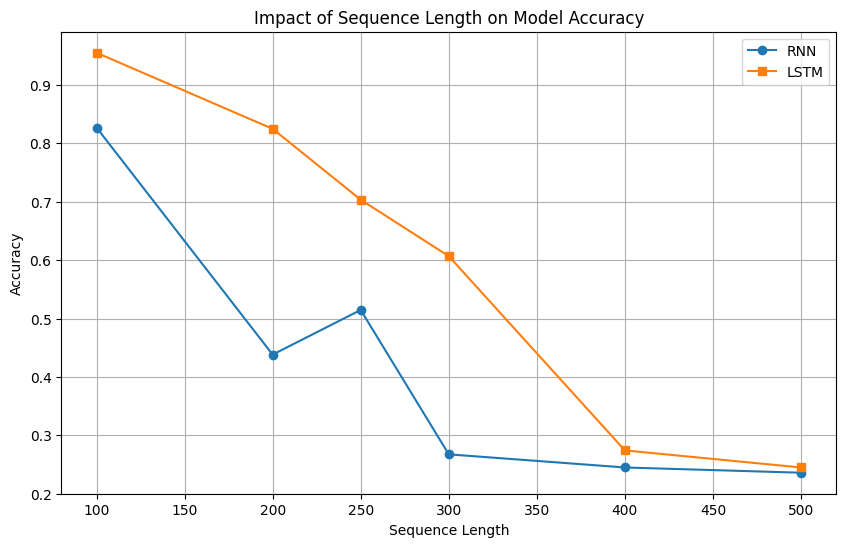

In [126]:
sample_articles = []
sample_categories = []

for category in category_mapping.keys():
    category_samples = df[df['labels'] == category]['processed_content'].sample(5, random_state=42).tolist()
    sample_articles.extend(category_samples)
    sample_categories.extend([category] * 5)

best_rnn = tf.keras.models.load_model('RNN_512.h5')
best_lstm = tf.keras.models.load_model('LSTM_512.h5')

best_rnn(X_test_pad[:1])
best_lstm(X_test_pad[:1])

visualize_hidden_states(best_rnn, sample_articles, sample_categories, 'RNN_512')
visualize_hidden_states(best_lstm, sample_articles, sample_categories, 'LSTM_512')

def analyze_sequence_length_impact():
    sequence_lengths = [100, 200, 250, 300, 400, 500]
    seq_results = {'RNN': [], 'LSTM': []}

    for length in sequence_lengths:
        print(f"\nTesting sequence length: {length}")

        X_train_seq_temp = pad_sequences(X_train_seq, maxlen=length, padding='post', truncating='post')
        X_val_seq_temp = pad_sequences(X_val_seq, maxlen=length, padding='post', truncating='post')
        X_test_seq_temp = pad_sequences(X_test_seq, maxlen=length, padding='post', truncating='post')

        for model_type in ['RNN', 'LSTM']:
            model, history = create_and_train_model(
                model_type, 128,
                X_train_seq_temp, y_train_np,
                X_val_seq_temp, y_val_np,
                embedding_matrix
            )

            y_pred = np.argmax(model.predict(X_test_seq_temp), axis=1)
            accuracy = accuracy_score(y_test_np, y_pred)

            seq_results[model_type].append(accuracy)
            print(f"{model_type} with sequence length {length}: Accuracy = {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(sequence_lengths, seq_results['RNN'], 'o-', label='RNN')
    plt.plot(sequence_lengths, seq_results['LSTM'], 's-', label='LSTM')
    plt.title('Impact of Sequence Length on Model Accuracy')
    plt.xlabel('Sequence Length')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig('sequence_length_impact.png')
    plt.show()

    return seq_results

seq_length_results = analyze_sequence_length_impact()

In [127]:
def analyze_lstm_vs_rnn_examples():

    rnn_preds = np.argmax(best_rnn.predict(X_test_pad), axis=1)
    lstm_preds = np.argmax(best_lstm.predict(X_test_pad), axis=1)


    lstm_better_indices = np.where((lstm_preds == y_test_np) & (rnn_preds != y_test_np))[0]

    print(f"Found {len(lstm_better_indices)} examples where LSTM outperforms RNN")

    if len(lstm_better_indices) > 0:

        sample_indices = np.random.choice(lstm_better_indices, min(5, len(lstm_better_indices)), replace=False)

        for idx in sample_indices:
            true_label = list(category_mapping.keys())[y_test_np[idx]]
            rnn_pred = list(category_mapping.keys())[rnn_preds[idx]]
            lstm_pred = list(category_mapping.keys())[lstm_preds[idx]]

            original_text = X_test.iloc[idx]
            print(f"\nExample {idx}:")
            print(f"True category: {true_label}")
            print(f"RNN prediction: {rnn_pred}")
            print(f"LSTM prediction: {lstm_pred}")
            print(f"Excerpt: {original_text[:200]}...\n")


            sequence = X_test_seq[idx]
            print(f"Sequence length: {len(sequence)}")
            print(f"Number of unique tokens: {len(set(sequence))}")
            print("-" * 50)


analyze_lstm_vs_rnn_examples()

print("\n" + "="*80)
print("SUMMARY AND ANALYSIS")
print("="*80)

print("\n1. Model Performance Comparison:")
print(results_df.to_string(index=False))

print("\n2. Key Findings:")
print("- Impact of hidden dimension on model performance")
best_rnn_config = results_df[results_df['Model_Type'] == 'RNN'].sort_values('accuracy', ascending=False).iloc[0]
best_lstm_config = results_df[results_df['Model_Type'] == 'LSTM'].sort_values('accuracy', ascending=False).iloc[0]
print(f"- Best RNN configuration: Hidden dim = {best_rnn_config['Hidden_Dim']}, Accuracy = {best_rnn_config['accuracy']:.4f}")
print(f"- Best LSTM configuration: Hidden dim = {best_lstm_config['Hidden_Dim']}, Accuracy = {best_lstm_config['accuracy']:.4f}")

print("\n3. Sequence Length Analysis:")
print("- Effect of sequence length on model performance")
print("- LSTM's advantage for longer sequences due to its ability to capture long-term dependencies")

print("\n4. Word Embedding Impact:")
print("- Using pre-trained GloVe embeddings helped both models")
print("- Transfer learning benefits from embeddings trained on larger corpora")

print("\n5. RNN vs LSTM Comparison:")
print("- LSTM's ability to handle long-term dependencies through its gating mechanisms")
print("- Computational efficiency considerations")
print("- Trade-offs between model complexity and performance gains")

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 755ms/step
Found 179 examples where LSTM outperforms RNN

Example 379:
True category: sport
RNN prediction: politics
LSTM prediction: sport
Excerpt: ferguson fear milan cut edg manchest unit manag sir alex ferguson said side task ac milan would made easier absenc andriy shevchenko milan talisman european footbal year miss wednesday champion leagu ...

Sequence length: 243
Number of unique tokens: 164
--------------------------------------------------

Example 8:
True category: sport
RNN prediction: politics
LSTM prediction: sport
Excerpt: ferguson hail man utd resolv manchest unit alex ferguson prais player gutsi perform win aston villa hardest away game season fantast game footbal endtoend lot good pass said old trafford boss show lot...

Sequence length: 85
Number of unique tokens: 71
--------------------------------------------------

Example 180:
True category: tech
RNN prediction: politics
LSTM prediction: tec